# Analysis of tire degradation and average time for each stint

In [ ]:
import matplotlib.pyplot as plt
import fastf1 as ff1

ff1.Cache.enable_cache('../CACHE_FASTF1')

## 1. GP Selection

In [21]:
year = 2025
gp = 'Hungarian Grand Prix'

session = ff1.get_session(year, gp, 'R')
session.load()

driver_id = 'NOR'
laps = session.laps.pick_driver(driver_id).pick_accurate()

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '14', '5', '18', '30', '1', '12', '6', '44', '27', '55', '23', '31', '22', '43', '10', '87']
/home/laora/f1/f1_proj_env/lib/python3.12/site-packages/fast

## 2. Data Preparation

In [22]:
stints = laps.loc[:, ['Stint', 'Compound', 'LapNumber', 'LapTime']]
stints['LapTime (s)'] = stints['LapTime'].dt.total_seconds()


stint_means = stints.groupby('Stint').agg(
    compound=('Compound', 'first'),
    lap_count=('LapNumber', 'count'),
    mean_lap_time=('LapTime (s)', 'mean')
).reset_index()


print("Mean lap time for each stint :")
print(stint_means)

Mean lap time for each stint :
   Stint compound  lap_count  mean_lap_time
0    1.0   MEDIUM         29      82.283586
1    2.0     HARD         38      80.509500


## 3. Visualization

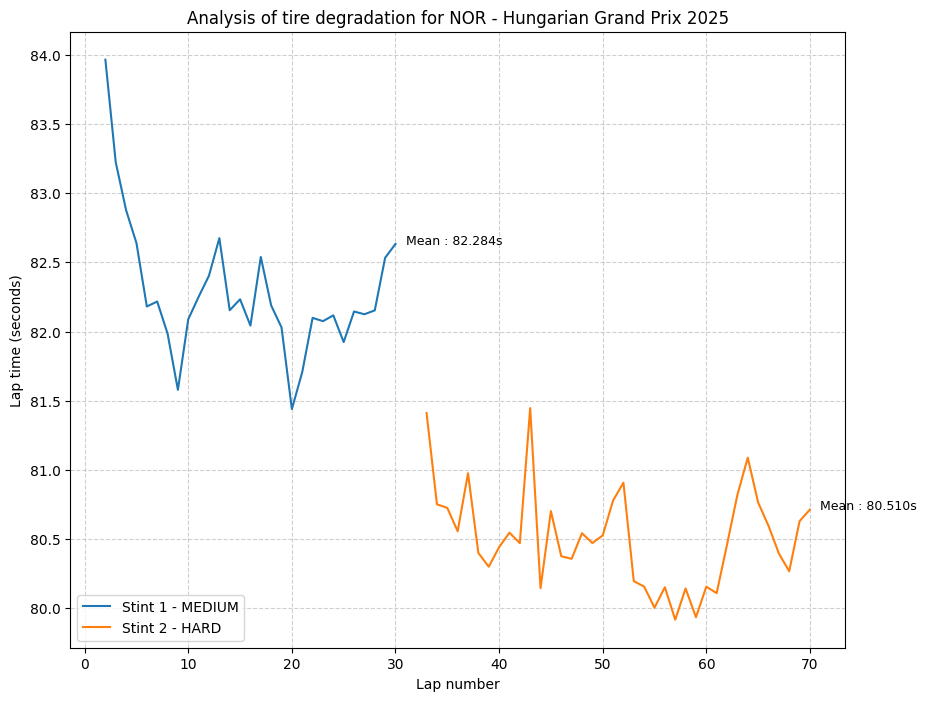

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

for stint in stints['Stint'].unique():
    data_stint = stints[stints['Stint'] == stint]
    compound = data_stint['Compound'].iloc[0]
    mean_time = stint_means.loc[stint_means['Stint'] == stint, 'mean_lap_time'].iloc[0]


    ax.plot(data_stint['LapNumber'], data_stint['LapTime (s)'], label=f"Stint {int(stint)} - {compound}")

    
    ax.text(
        x=data_stint['LapNumber'].iloc[-1] + 1,  
        y=data_stint['LapTime (s)'].iloc[-1],
        s=f"Mean : {mean_time:.3f}s",
        fontsize=9,
        color='black'
    )

ax.set_title(f"Analysis of tire degradation for {driver_id} - {gp} {year}")
ax.set_xlabel("Lap number")
ax.set_ylabel("Lap time (seconds)")
ax.legend(loc='lower left')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()